# Computational compositions

### Imports

In [1]:
import os
from datetime import datetime

from utils import plot_sample_grid
from computational_compositions import run_interactive_comp_comp, save_grid_sys_as_pickle, export_optimisation_video_and_final_grid_image

import sys
sys.path.append("training")
from train import load_netG_for_eval

### Set some globals

In [2]:
CHECKPOINT_DIR = "checkpoints"
OUTPUT_DIR = "output_dir/2_computational_compositions"
SUPER_RES_MODEL_DIR = "lap_sr_models"
DEVICE = "cpu"

os.makedirs(OUTPUT_DIR, exist_ok=True)

### Load a trained GAN generator from a checkpoint

In [5]:
# One checkpoint by default, you may add you're own checkpoints by altering this line
all_checkpoints = [f"{CHECKPOINT_DIR}/{ckpt}" for ckpt in os.listdir("checkpoints") if "PART-2" in ckpt]
print("Available checkpoints:")
for i, ckpt in enumerate(all_checkpoints):
    print(i, ckpt)

Available checkpoints:
0 checkpoints/PART-2-GAN-IDX-4-DATASET-dataset_tile_gan_28_03_flat_3-EPOCH-97.pt
1 checkpoints/PART-2-GAN-IDX-0-DATASET-tile_dataset-EPOCH-99.pt
2 checkpoints/PART-2-GAN-IDX-19-DATASET-tile_gan_14_april_black_background_3-EPOCH-115.pt
3 checkpoints/PART-2-GAN-IDX-3-DATASET-dataset_tile_gan_28_03_flat_2-EPOCH-95.pt
4 checkpoints/PART-2-GAN-IDX-8-DATASET-tile_gan_05_april-EPOCH-99.pt


In [6]:
checkpoint_idx = int(input(f"Which checkpoint would you like to use? (0-{len(all_checkpoints)})"))
checkpoint = all_checkpoints[checkpoint_idx]
netG, hp = load_netG_for_eval(checkpoint_path=checkpoint, device=DEVICE)

print("Checkpoint used for this demo:", checkpoint)
print("Generator network:", netG)
print("Hyper pameters:")
for k, v in hp.items():
    print(f"\t{k} : {v}")

Checkpoint used for this demo: checkpoints/PART-2-GAN-IDX-19-DATASET-tile_gan_14_april_black_background_3-EPOCH-115.pt
Generator network: Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): 

### Plot some random samples from the generator

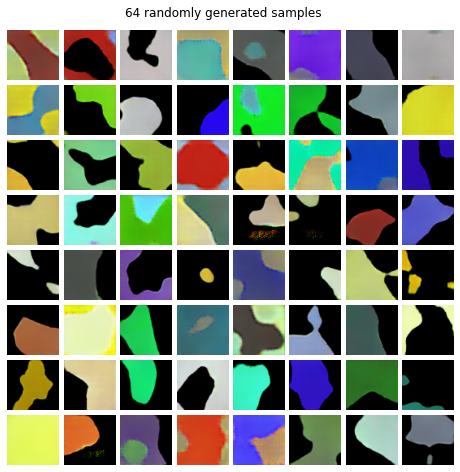

In [7]:
n_samples = 64
n_cols = 8

noise, images = plot_sample_grid(64, netG, nz=hp["nz"], scale=1.0, fixed_noise=None, cell_size=1.0, 
                                 title=f"{n_samples} randomly generated samples", wspace=0.1, hspace=0.1,
                                 device=DEVICE, ncols=n_cols, title_y=0.92)

# Run interactive computational composition

Expanding to index: 0
Sample random, because there exist no constraints


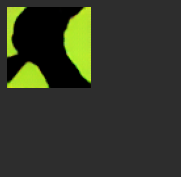


Expanding to index: 1
Constraining sides ['left']
len(targets) [B] len(targets[0]) [N_constraints_0] 1 1
len(loss_masks) [B] len(loss_masks[0]) [N_constraints_0] 1 1
step    1/400: loss 4.52792645 lr: 0.0500000000| 0: 4.53
step  101/400: loss 0.85358119 lr: 0.0500000000| 0: 0.85
step  201/400: loss 0.86106753 lr: 0.0500000000| 0: 0.86
step  301/400: loss 0.91280758 lr: 0.0500000000| 0: 0.91
step  400/400: loss 0.96321714 lr: 0.0500000000| 0: 0.96


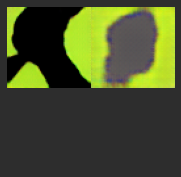


Expanding to index: 2
Constraining sides ['top']
len(targets) [B] len(targets[0]) [N_constraints_0] 1 1
len(loss_masks) [B] len(loss_masks[0]) [N_constraints_0] 1 1
step    1/400: loss 3.54471493 lr: 0.0500000000| 0: 3.54
step  101/400: loss 1.01309526 lr: 0.0500000000| 0: 1.01
step  201/400: loss 1.38029289 lr: 0.0500000000| 0: 1.38
step  301/400: loss 1.08420360 lr: 0.0500000000| 0: 1.08
step  400/400: loss 1.11608386 lr: 0.0500000000| 0: 1.12


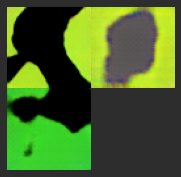


Constraining sides ['top']
len(targets) [B] len(targets[0]) [N_constraints_0] 1 1
len(loss_masks) [B] len(loss_masks[0]) [N_constraints_0] 1 1
step    1/400: loss 4.29260015 lr: 0.0500000000| 0: 4.29
step  101/400: loss 0.94118428 lr: 0.0500000000| 0: 0.94
step  201/400: loss 0.85331148 lr: 0.0500000000| 0: 0.85
step  301/400: loss 1.11116385 lr: 0.0500000000| 0: 1.11
step  400/400: loss 1.06070137 lr: 0.0500000000| 0: 1.06


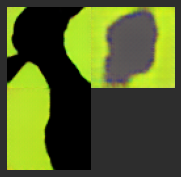


Expanding to index: 3
Constraining sides ['top', 'left']
len(targets) [B] len(targets[0]) [N_constraints_0] 1 2
len(loss_masks) [B] len(loss_masks[0]) [N_constraints_0] 1 2
step    1/400: loss 7.44011879 lr: 0.0500000000| 0: 7.44
step  101/400: loss 3.59358048 lr: 0.0500000000| 0: 3.59
step  201/400: loss 0.88598216 lr: 0.0500000000| 0: 0.89
step  301/400: loss 0.91868448 lr: 0.0500000000| 0: 0.92
step  400/400: loss 0.92349911 lr: 0.0500000000| 0: 0.92


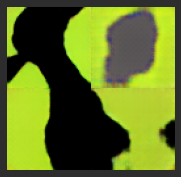

In [8]:
# Set this higher to make larger grids
nrows = ncols = 2
n_pixels_boundary = 4
num_optim_steps = 400

grid_sys = run_interactive_comp_comp(netG, initial_latent=None, nrows=nrows, ncols=ncols, n_pixels_boundary=n_pixels_boundary,
                                     plot_losses=False, device="cpu", nz=hp["nz"], lr=0.05, num_steps=num_optim_steps, latent_range=2.5,
                                     max_weight_pixel=100.0, min_weight_pixel=99.0, max_weight_reg=5.0, min_weight_reg=3.0,
                                     latent_std=1.0, initial_noise_factor=0.05, noise_ramp_length=0.75, max_noise=0.05)

### Save results and export to video

Saving results in directory: output_dir/2_computational_compositions/06-15-2022---193843
Dumped as pickle in output_dir/2_computational_compositions/06-15-2022---193843/grid_sys.pickle
Number of images (nrows x ncols): 4 (2 x 2
Image shape: torch.Size([3, 64, 64])
Number of optimisation steps: 400
Start exporting video with super_resolution = False


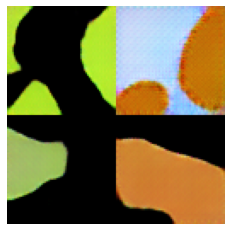

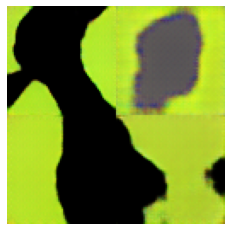

Done making video, saved at: output_dir/2_computational_compositions/06-15-2022---193843/grid-optimisation-video.mp4
Done


In [9]:
from computational_compositions import save_grid_sys_as_pickle, export_optimisation_video_and_final_grid_image

date_time = datetime.now().strftime("%m-%d-%Y---%H%M%S")
save_dir = f"{OUTPUT_DIR}/{date_time}"
os.makedirs(save_dir)

print("Saving results in directory:", save_dir)
grid_sys_dict = save_grid_sys_as_pickle(grid_sys, save_dir)

# Set this to True to upscale the images, but note this takes much longer to process!
super_resolution = False
super_resolution_times = 4

export_optimisation_video_and_final_grid_image(grid_sys_dict, ncols, nrows, num_optim_steps, save_dir, SUPER_RES_MODEL_DIR, super_resolution=False, super_resolution_times=4)